In [ ]:
%%capture
#@markdown # DeepLab inference
!python -m pip install abraia

import os
if not os.getenv('ABRAIA_ID') and not os.getenv('ABRAIA_KEY'):
    abraia_id = ''  #@param {type: "string"}
    abraia_key = ''  #@param {type: "string"}
    %env ABRAIA_ID=$abraia_id
    %env ABRAIA_KEY=$abraia_key

from abraia import Abraia

abraia = Abraia()

screws/038.png [{'label': 'good', 'confidence': 0.5959365, 'color': '#F5A623'}]


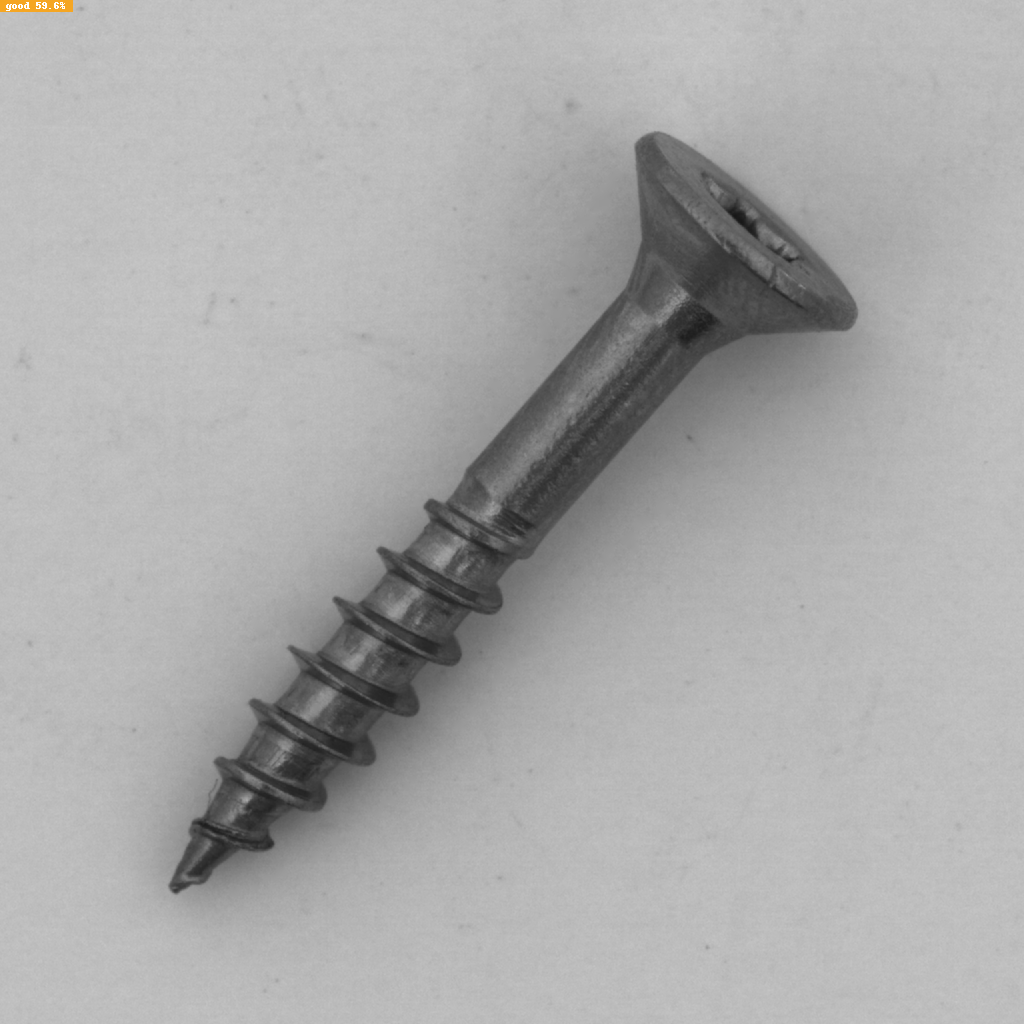

In [ ]:
from abraia import detect

dataset = 'screws'
model_name = 'model_ft'
model_uri = f"https://api.abraia.me/files/{abraia_id}/{dataset}/{model_name}.onnx"

files = abraia.list_files(f"{dataset}/*.png")[0]
path = files[0]['path']

model = detect.load_model(model_uri)

im = abraia.load_image(path).convert('RGB')
results = model.run(im)
print(path, results)

im = detect.render_results(im, results)
im